## Cholesterol Analysis
The full dataset has been loaded and split into two subsets:

`yes_hd`, which contains data for patients with heart disease
`no_hd`, which contains data for patients without heart disease

For this project, we’ll investigate the following variables:

`chol`: serum cholestorol in mg/dl
`fbs`: an indicator for whether fasting blood sugar is greater than 120 mg/dl (`1` = true; `0` = false)

In [18]:
# Import libraries
import pandas as pd
import numpy as np

from scipy.stats import ttest_1samp
from scipy.stats import binom_test
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt 
import seaborn as sns

# Load data
heart = pd.read_csv('heart_disease_data.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

To start, we’ll investigate cholesterol levels for patients with heart disease. We'll be using the dataset `yes_hd` to save cholesterol levels for patients with heart disease as a variable named `chol_hd`.

In [3]:
# Get cholesterol levels for patients with heart disease
chol_hd = yes_hd.chol

# Calculate the mean cholesterol for people with heart disease
mean_chol_hd = np.mean(chol_hd)
# Print the rounded value
print(round(mean_chol_hd))

251


We want to know if people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average. We'll have to run a two-sided test for it.

In [4]:
# Compare to cut-off for high cholesterol
tstat, pval = ttest_1samp(chol_hd, 240)
# Calculate the p-value for the one-sided test by dividing the two-sided p-value in half
print(pval/2)

0.0035411033905155703


The result `0.0035` is less than a significance threshold of `0.05`, suggesting that heart disease patients have an average cholesterol level higher than 240 mg/dl.

Now we want to answer the same question for patients without heart disease, thus we'll repeat the previous steps for `no_hd`.

In [5]:
# Get cholesterol levels for patients without heart disease
chol_no_hd = no_hd.chol

# Calculate the mean cholesterol for people without heart disease
mean_chol_no_hd = np.mean(chol_no_hd)
# Print the rounded value
print(round(mean_chol_no_hd))

# Compare to cut-off for high cholesterol
tstat, pval = ttest_1samp(chol_no_hd, 240)
# Calculate the p-value for the one-sided test by dividing the two-sided p-value in half
print(pval/2)

243
0.26397120232220506


## Fasting Blood Sugar Analysis

The fbs column of this dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl (`1` means that their fasting blood sugar was greater than 120 mg/dl; `0` means it was less than or equal to 120 mg/dl). Thus, we can first calculate the length of the dataset and then use `sum` to separate those of greater blood sugar value.

In [6]:
# Calculate the total number of patients in the heart dataset
num_patients = len(heart)
# Print the results
print(num_patients)

# Calculate number of patients with fbs>120
num_highfbs_patients = np.sum(heart.fbs)
# Print the results
print(num_highfbs_patients)

303
45.0


Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population. By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988. 

While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). We want to know approximately how many people would have diabetes, if this sample were representative of the population.



In [7]:
# Calculate 8% of sample size
print(round(0.08*num_patients))

24


This comes out to approximately 24 patients, which is almost half the number with fbs > 120 in the sample (45).

We now can test the following null and alternative hypotheses:

- Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

The `binom_test()` function takes four parameters:
- The number of people in the sample who had fasting blood sugar greater than 120 mg/dl
- The total number of patients
- The null probability of "success" - in this case, 0.08
- The alternative parameter, which indicates the alternative hypothesis for the test - in this case, "greater"
The output is the p-value.

In [8]:
# Run binomial test
pval = binom_test(num_highfbs_patients, num_patients, .08, alternative='greater')
# Print the result
print(pval)

4.6894719514488777e-05



The result is equivalent to 0.0000469. This is less than a significance threshold of 0.05, indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl.

### Predictors of Heart Disease
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

We'd like to see if `thalach` is associated with whether or not a patient will ultimately be diagnosed with `heart_disease`. We'll plot side by side box plots of `thalach` for patients who were and were not diagnosed to check if there is a relationship between variables.

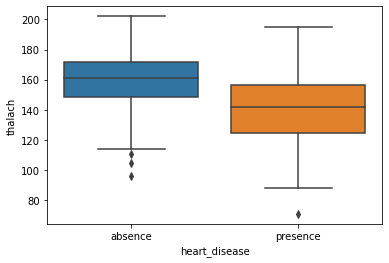

In [9]:
# Create and show box plots of thalach based on heart disease
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()

Based on this plot, patients diagnosed with heart disease generally had a lower maximum heart rate during their exercise test.

In [17]:
# Save thalach for hd patients and non-hd patients
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

# Calculate and print mean difference
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print("Mean Difference for thalach: ", round(mean_diff, 2))

# Calculate and print median difference
med_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print("Median Difference for thalach: ", med_diff)

Mean Difference for thalach:  19.12
Median Difference for thalach:  19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease. We'll test the following null and alternative hypotheses:
- null: the average thalach for a person with heart disease is equal to the average thalach for a person without heart disease
- alternative: the average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease

In [19]:
# Run two-sample t-test
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print("p-value for `thalach` two-sample t-test: ", pval)

p-value for `thalach` two-sample t-test:  3.456964908430172e-14


The result of the two-sample test is equivalent to 0.00000000000003457. Using a significance threshold of 0.05, we “reject the null hypothesis” and conclude that there is a significant difference in 'thalach' for people with heart disease compared to people without heart disease.

Using the same process, let's investigate other quantitative variables.

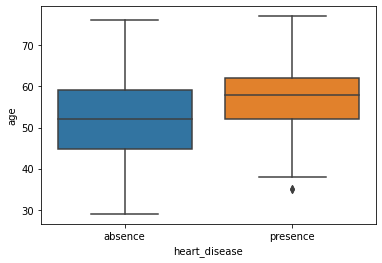

Mean Difference for age:  4.040533426917001
Median Difference for age:  6.0
p-value for age two-sample t-test:  8.95563691752971e-05


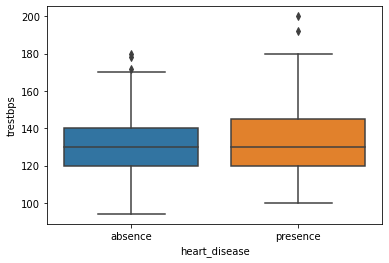

Mean Difference for trestbps:  5.318345323740999
Median Difference for trestbps:  0.0
p-value for trestbps two-sample t-test:  0.008548268928594928


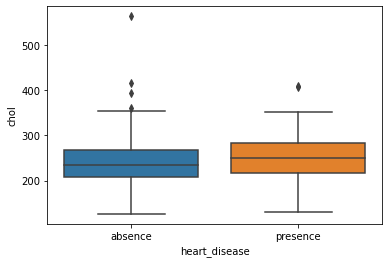

Mean Difference for chol:  8.834576241445887
Median Difference for chol:  14.5
p-value for chol two-sample t-test:  0.13914167020436527


In [21]:
# Calculate age variable
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print("Mean Difference for age: ", mean_diff)

med_diff = np.median(age_hd) - np.median(age_no_hd)
print("Median Difference for age: ", med_diff)

tstat, pval = ttest_ind(age_hd, age_no_hd)
print("p-value for age two-sample t-test: ", pval)

# Calculate trestbps variable
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']

mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
print("Mean Difference for trestbps: ", mean_diff)

med_diff = np.median(trestbps_hd) - np.median(trestbps_no_hd)
print("Median Difference for trestbps: ", med_diff)

tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print("p-value for trestbps two-sample t-test: ", pval)

# Calculate chol variable
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']

mean_diff = np.mean(chol_hd) - np.mean(chol_no_hd)
print("Mean Difference for chol: ", mean_diff)

med_diff = np.median(chol_hd) - np.median(chol_no_hd)
print("Median Difference for chol: ", med_diff)

tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print("p-value for chol two-sample t-test: ", pval)

### Chest Pain and Max Heart Rate
Now we want to investigate the relationship between `thalach` (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Let's create a set of side-by-side box plots of thalach for each chest pain type in the data. 